# Scraping playlist from Spotify

# Instructions

* To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!


* These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.


* The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.


* An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pandas as pd

In [95]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
client_id = getpass.getpass('client_id')
client_secret = getpass.getpass('client_secret')

In [6]:

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="",
                                                          client_secret=""))

# Explore Drake

In [7]:
results = sp.search(q="Drake", limit=50)

In [8]:
type(results)

dict

In [9]:
results.keys()

dict_keys(['tracks'])

In [10]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Drake&type=track&offset=0&limit=50',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
       'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
       'id': '3TVXtAsR1Inumwj472S9r4',
       'name': 'Drake',
       'type': 'artist',
       'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',
      'DK',
      'DM',
   

In [11]:
results['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [12]:
results['tracks']['href']

'https://api.spotify.com/v1/search?query=Drake&type=track&offset=0&limit=50'

In [13]:
results["tracks"]["items"]

[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
     'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
     'id': '3TVXtAsR1Inumwj472S9r4',
     'name': 'Drake',
     'type': 'artist',
     'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FJ',
    'FM',
    'FR',
    'GA',
    'GB',
    'GD',
    'GE',
    'GH',
    'GM',
    'GN',
    'GQ',
    'GR',
    'GT',
    'GW'

In [14]:
results["tracks"]['limit']

50

In [15]:
results['tracks']['next']

'https://api.spotify.com/v1/search?query=Drake&type=track&offset=50&limit=50'

In [16]:
results['tracks']['offset']

0

In [17]:
results['tracks']['previous']

In [18]:
results['tracks']['total']

30354

# Explore items

In [19]:
len(results['tracks']['items'])

50

In [20]:
results['tracks']['items'][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [21]:
results['tracks']['items'][0]['album'].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [22]:
results['tracks']['items'][0]['album']['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
  'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
  'id': '3TVXtAsR1Inumwj472S9r4',
  'name': 'Drake',
  'type': 'artist',
  'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}]

In [23]:
results['tracks']['items'][0]['album']['id']

'5LuoozUhs2pl3glZeAJl89'

In [24]:
results['tracks']['items'][0]['album']['name']

'Scary Hours 2'

In [25]:
results['tracks']['items'][0]['album']['release_date']

'2021-03-05'

In [26]:
results['tracks']['items'][0]['album']['total_tracks']

3

In [27]:
results['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
  'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
  'id': '3TVXtAsR1Inumwj472S9r4',
  'name': 'Drake',
  'type': 'artist',
  'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5f7VJjfbwm532GiveGC0ZK'},
  'href': 'https://api.spotify.com/v1/artists/5f7VJjfbwm532GiveGC0ZK',
  'id': '5f7VJjfbwm532GiveGC0ZK',
  'name': 'Lil Baby',
  'type': 'artist',
  'uri': 'spotify:artist:5f7VJjfbwm532GiveGC0ZK'}]

In [28]:
results['tracks']['items'][0]['id']

'65OVbaJR5O1RmwOQx0875b'

In [29]:
results['tracks']['items'][0]['name']

'Wants and Needs (feat. Lil Baby)'

In [30]:
results['tracks']['items'][0]['popularity']

89

In [31]:
results['tracks']['items'][0]['uri']

'spotify:track:65OVbaJR5O1RmwOQx0875b'

# Playlist

In [32]:
playlist = sp.user_playlist_tracks("The Swinging Turtle", "5TZkls9cEOzWDR6qCxwDot")

In [33]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [34]:
len(playlist['items'])

100

In [62]:
#The whole playlist
for item in playlist['items']:
    print(item['track']['id'])

Hiphop = []
for item in playlist['items']:
    Hiphop.append(item['track']['id'])

43PGPuHIlVOc04jrZVh9L6
7ytR5pFWmSjzHJIeQkgog4
65OVbaJR5O1RmwOQx0875b
5vGLcdRuSbUhD8ScwsGSdA
2cnKST6T9qUo2i907lm8zX
2r6OAV3WsYtXuXjvJ1lIDi
1D3z6HTiQsNmZxjl7F7eoG
4VW44pawoOHPUjlN7DX5vk
6uvMKqNlrSvcC4NaKnrwjZ
0PvFJmanyNQMseIFrU708S
3aQem4jVGdhtg116TmJnHz
285pBltuF7vW8TeWk8hdRR
0e7ipj03S05BNilyu5bRzt
5yY9lUy8nbvjM1Uyo1Uqoc
5W8jRrZ6tWrTrqnKRtIQBf
5Kskr9LcNYa0tpt5f0ZEJx
6gBFPUFcJLzWGx4lenP6h2
2SAqBLGA283SUiwJ3xOUVI
4TIqzdAssasqx3DAe6cG9J
2gyYjQWXKxemhAyMPgctIx
2Ox2c1WEJDeQCHTXPE3YKM
6rTInqW3YECMkQsBEHw4sd
17vGPZ5EsdvtgAOCD4FLWI
3eekarcy7kvN4yt5ZFzltW
4Iedi94TIaB2GGb1nMB68v
6Qfcmquht50gQWbUbXiDnf
7o4gBbTM6UBLkOYPw9xMCz
6toQdWWc4noiOk3Eo5mVDS
0tIHHwV2eL10rpQ1fiyDjz
4oYH9ASuD0zMUpGKiyhEBf
02kDW379Yfd5PzW5A6vuGt
3ebPtoL5HOOS5r28CzmLbj
6cQ08IpBxxfGcSKxqE3NmB
2nPqkrxKkDu71sYiHDFPjn
0rozVEMymlZH9dvu2jFr8M
6uFn47ACjqYkc0jADwEdj1
71KEVaB5zBPTmhR42Xznkr
1dg3qy5DjoJodawfOCgrTP
0k7wmahjkn389wAZdz19Cv
5YEOzOojehCqxGQCcQiyR4
3fUKv3kIexMFOmYsUYvbXJ
3RHCJjmc6dZycqVUqYZgLI
62vpWI1CHwFy7tMIcSStl8
1UooOpZ9LTG

In [63]:
Hiphop

['43PGPuHIlVOc04jrZVh9L6',
 '7ytR5pFWmSjzHJIeQkgog4',
 '65OVbaJR5O1RmwOQx0875b',
 '5vGLcdRuSbUhD8ScwsGSdA',
 '2cnKST6T9qUo2i907lm8zX',
 '2r6OAV3WsYtXuXjvJ1lIDi',
 '1D3z6HTiQsNmZxjl7F7eoG',
 '4VW44pawoOHPUjlN7DX5vk',
 '6uvMKqNlrSvcC4NaKnrwjZ',
 '0PvFJmanyNQMseIFrU708S',
 '3aQem4jVGdhtg116TmJnHz',
 '285pBltuF7vW8TeWk8hdRR',
 '0e7ipj03S05BNilyu5bRzt',
 '5yY9lUy8nbvjM1Uyo1Uqoc',
 '5W8jRrZ6tWrTrqnKRtIQBf',
 '5Kskr9LcNYa0tpt5f0ZEJx',
 '6gBFPUFcJLzWGx4lenP6h2',
 '2SAqBLGA283SUiwJ3xOUVI',
 '4TIqzdAssasqx3DAe6cG9J',
 '2gyYjQWXKxemhAyMPgctIx',
 '2Ox2c1WEJDeQCHTXPE3YKM',
 '6rTInqW3YECMkQsBEHw4sd',
 '17vGPZ5EsdvtgAOCD4FLWI',
 '3eekarcy7kvN4yt5ZFzltW',
 '4Iedi94TIaB2GGb1nMB68v',
 '6Qfcmquht50gQWbUbXiDnf',
 '7o4gBbTM6UBLkOYPw9xMCz',
 '6toQdWWc4noiOk3Eo5mVDS',
 '0tIHHwV2eL10rpQ1fiyDjz',
 '4oYH9ASuD0zMUpGKiyhEBf',
 '02kDW379Yfd5PzW5A6vuGt',
 '3ebPtoL5HOOS5r28CzmLbj',
 '6cQ08IpBxxfGcSKxqE3NmB',
 '2nPqkrxKkDu71sYiHDFPjn',
 '0rozVEMymlZH9dvu2jFr8M',
 '6uFn47ACjqYkc0jADwEdj1',
 '71KEVaB5zBPTmhR42Xznkr',
 

In [64]:
# these are the audio features for all songs in the playlist
sp.audio_features(tracks=Hiphop)

[{'danceability': 0.789,
  'energy': 0.536,
  'key': 6,
  'loudness': -6.862,
  'mode': 1,
  'speechiness': 0.242,
  'acousticness': 0.41,
  'instrumentalness': 0,
  'liveness': 0.129,
  'valence': 0.437,
  'tempo': 81.039,
  'type': 'audio_features',
  'id': '43PGPuHIlVOc04jrZVh9L6',
  'uri': 'spotify:track:43PGPuHIlVOc04jrZVh9L6',
  'track_href': 'https://api.spotify.com/v1/tracks/43PGPuHIlVOc04jrZVh9L6',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/43PGPuHIlVOc04jrZVh9L6',
  'duration_ms': 165926,
  'time_signature': 4},
 {'danceability': 0.746,
  'energy': 0.69,
  'key': 11,
  'loudness': -7.956,
  'mode': 1,
  'speechiness': 0.164,
  'acousticness': 0.247,
  'instrumentalness': 0,
  'liveness': 0.101,
  'valence': 0.497,
  'tempo': 89.977,
  'type': 'audio_features',
  'id': '7ytR5pFWmSjzHJIeQkgog4',
  'uri': 'spotify:track:7ytR5pFWmSjzHJIeQkgog4',
  'track_href': 'https://api.spotify.com/v1/tracks/7ytR5pFWmSjzHJIeQkgog4',
  'analysis_url': 'https://api.spotify.com

1.Determine the audio features of the input song by querying the Spotify API with it. Store that result in a dataframe or numpy array (if the latter, keep track of which element in the array corresponds to which feature). Don't spend too much time on implementing any guessing that should be done by your program (whether user inputs the correct song). To get a working recommender ready, first assume that the user puts in a track name and/or an artist that exactly matches how they are stored in the spotify database.

2.take the vastness of songs you have collected together with their audio features and train a k-means model with them - similar how we did in lecture (scaling is important!). Keep in mind, that it doesn't make sense to train a model, when you have artist or title name or track id in the data. You need to however have the possibility to later (after your model has determined the cluster ids) reassign the correct track ids to the rows. You can do this by just adding back the track id to the dataframe that contains the determined cluster id's, but of course only if you haven't shuffled your data rowwise. You can optimize a bit the parameters, but for a first iteration of your model, just go with the default values of KMeans and stick with it. Only improve later by tuning the parameters.

3."Predicting" which cluster id a song belongs to, would work like this: take the audio-features of the song and put it into a numpy array, let's say song_array. The audio feature order must exactly match the order that the model has learned. Call the model with KMeans.predict(song_array) to make the prediction. The outcome is only one cluster
The recommendation would then work like this: Take the determined cluster id from 2. and subset your spotipy dataframe to filter for this cluster with e.g. df[df["cluster_id'']==2] and get a random song back from that subset. You can take a look at pandas.DataFrame.sample
(edited)
white_check_mark
eyes
raised_hands







In [65]:
audio_features_hiphop = pd.DataFrame(sp.audio_features(tracks=Hiphop))

In [66]:
audio_features_hiphop.head(100)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.789,0.536,6,-6.862,1,0.2420,0.41000,0.000000,0.1290,0.437,81.039,audio_features,43PGPuHIlVOc04jrZVh9L6,spotify:track:43PGPuHIlVOc04jrZVh9L6,https://api.spotify.com/v1/tracks/43PGPuHIlVOc...,https://api.spotify.com/v1/audio-analysis/43PG...,165926,4
1,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.497,89.977,audio_features,7ytR5pFWmSjzHJIeQkgog4,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4
2,0.578,0.449,1,-6.349,1,0.2860,0.06180,0.000002,0.1190,0.100,136.006,audio_features,65OVbaJR5O1RmwOQx0875b,spotify:track:65OVbaJR5O1RmwOQx0875b,https://api.spotify.com/v1/tracks/65OVbaJR5O1R...,https://api.spotify.com/v1/audio-analysis/65OV...,192956,4
3,0.719,0.648,3,-7.600,0,0.1250,0.20000,0.000000,0.1270,0.660,140.201,audio_features,5vGLcdRuSbUhD8ScwsGSdA,spotify:track:5vGLcdRuSbUhD8ScwsGSdA,https://api.spotify.com/v1/tracks/5vGLcdRuSbUh...,https://api.spotify.com/v1/audio-analysis/5vGL...,123263,4
4,0.725,0.713,4,-6.173,0,0.1870,0.12700,0.000000,0.6170,0.207,65.988,audio_features,2cnKST6T9qUo2i907lm8zX,spotify:track:2cnKST6T9qUo2i907lm8zX,https://api.spotify.com/v1/tracks/2cnKST6T9qUo...,https://api.spotify.com/v1/audio-analysis/2cnK...,148421,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.754,0.578,11,-6.100,0,0.0674,0.08670,0.000000,0.3410,0.360,141.005,audio_features,5Awic3Q2wuEp6LrwPdTVis,spotify:track:5Awic3Q2wuEp6LrwPdTVis,https://api.spotify.com/v1/tracks/5Awic3Q2wuEp...,https://api.spotify.com/v1/audio-analysis/5Awi...,221277,4
96,0.868,0.479,4,-6.687,0,0.4450,0.70300,0.000000,0.1020,0.776,133.928,audio_features,2AlYncTpVHKwHb55F9lF6O,spotify:track:2AlYncTpVHKwHb55F9lF6O,https://api.spotify.com/v1/tracks/2AlYncTpVHKw...,https://api.spotify.com/v1/audio-analysis/2AlY...,115200,4
97,0.631,0.652,8,-6.434,1,0.0441,0.06950,0.004140,0.0892,0.498,81.976,audio_features,6YmN7cjEk8BNkpgfHejWKh,spotify:track:6YmN7cjEk8BNkpgfHejWKh,https://api.spotify.com/v1/tracks/6YmN7cjEk8BN...,https://api.spotify.com/v1/audio-analysis/6YmN...,222439,4
98,0.592,0.592,8,-8.634,1,0.0370,0.00283,0.025800,0.3440,0.436,156.022,audio_features,0YS220ygbaoFArYRXJaxQE,spotify:track:0YS220ygbaoFArYRXJaxQE,https://api.spotify.com/v1/tracks/0YS220ygbaoF...,https://api.spotify.com/v1/audio-analysis/0YS2...,246312,4


In [67]:
audio_features_hiphop.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.00000
mean,0.770340,0.578200,5.270000,-7.203550,0.470000,0.221621,0.151750,1.736132e-03,0.175671,0.427446,126.830210,189754.180000,3.95000
std,0.115069,0.113048,3.923138,1.982613,0.501614,0.132573,0.158865,1.074912e-02,0.126917,0.197710,27.831046,38895.026982,0.35887
min,0.456000,0.298000,0.000000,-12.326000,0.000000,0.031700,0.000407,0.000000e+00,0.056500,0.060500,65.988000,115200.000000,1.00000
25%,0.707500,0.499000,1.000000,-8.528250,0.000000,0.102750,0.034925,0.000000e+00,0.103000,0.280750,105.884250,165589.500000,4.00000
50%,0.781500,0.576500,5.500000,-6.869500,0.000000,0.201500,0.100900,0.000000e+00,0.126500,0.427500,134.558000,186933.500000,4.00000
75%,0.861000,0.647250,8.000000,-5.829500,1.000000,0.319500,0.217000,3.375000e-07,0.186250,0.552250,144.878000,216306.500000,4.00000
max,0.963000,0.869000,11.000000,-3.370000,1.000000,0.530000,0.703000,1.010000e-01,0.790000,0.961000,202.015000,312820.000000,5.00000


In [41]:
audio_features_hiphop.keys()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [42]:
print(audio_features_hiphop['danceability'])

0     0.789
1     0.746
2     0.578
3     0.719
4     0.725
      ...  
95    0.754
96    0.868
97    0.631
98    0.592
99    0.891
Name: danceability, Length: 100, dtype: float64


In [43]:
print(audio_features_hiphop['energy'])

0     0.536
1     0.690
2     0.449
3     0.648
4     0.713
      ...  
95    0.578
96    0.479
97    0.652
98    0.592
99    0.552
Name: energy, Length: 100, dtype: float64


In [44]:
print(audio_features_hiphop['key'])

0      6
1     11
2      1
3      3
4      4
      ..
95    11
96     4
97     8
98     8
99     1
Name: key, Length: 100, dtype: int64


In [45]:
print(audio_features_hiphop['loudness'])  

0    -6.862
1    -7.956
2    -6.349
3    -7.600
4    -6.173
      ...  
95   -6.100
96   -6.687
97   -6.434
98   -8.634
99   -6.877
Name: loudness, Length: 100, dtype: float64


In [46]:
print(audio_features_hiphop['mode']) 

0     1
1     1
2     1
3     0
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: mode, Length: 100, dtype: int64


In [47]:
print(audio_features_hiphop['speechiness']) 

0     0.2420
1     0.1640
2     0.2860
3     0.1250
4     0.1870
       ...  
95    0.0674
96    0.4450
97    0.0441
98    0.0370
99    0.2230
Name: speechiness, Length: 100, dtype: float64


In [48]:
print(audio_features_hiphop['acousticness']) 

0     0.41000
1     0.24700
2     0.06180
3     0.20000
4     0.12700
       ...   
95    0.08670
96    0.70300
97    0.06950
98    0.00283
99    0.00225
Name: acousticness, Length: 100, dtype: float64


In [49]:
print(audio_features_hiphop['instrumentalness']) 

0     0.000000
1     0.000000
2     0.000002
3     0.000000
4     0.000000
        ...   
95    0.000000
96    0.000000
97    0.004140
98    0.025800
99    0.000002
Name: instrumentalness, Length: 100, dtype: float64


In [50]:
print(audio_features_hiphop['liveness']) 

0     0.1290
1     0.1010
2     0.1190
3     0.1270
4     0.6170
       ...  
95    0.3410
96    0.1020
97    0.0892
98    0.3440
99    0.1620
Name: liveness, Length: 100, dtype: float64


In [51]:
print(audio_features_hiphop['valence']) 

0     0.437
1     0.497
2     0.100
3     0.660
4     0.207
      ...  
95    0.360
96    0.776
97    0.498
98    0.436
99    0.455
Name: valence, Length: 100, dtype: float64


In [52]:
print(audio_features_hiphop['tempo']) 

0      81.039
1      89.977
2     136.006
3     140.201
4      65.988
       ...   
95    141.005
96    133.928
97     81.976
98    156.022
99    135.976
Name: tempo, Length: 100, dtype: float64


In [53]:
print(audio_features_hiphop['type']) 

0     audio_features
1     audio_features
2     audio_features
3     audio_features
4     audio_features
           ...      
95    audio_features
96    audio_features
97    audio_features
98    audio_features
99    audio_features
Name: type, Length: 100, dtype: object


In [72]:
audio_features_hiphop.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [73]:
feats = audio_features_hiphop[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id']]

In [74]:
feats

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id
0,0.789,0.536,6,-6.862,1,0.2420,0.41000,0.000000,0.1290,0.437,81.039,audio_features,43PGPuHIlVOc04jrZVh9L6
1,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.497,89.977,audio_features,7ytR5pFWmSjzHJIeQkgog4
2,0.578,0.449,1,-6.349,1,0.2860,0.06180,0.000002,0.1190,0.100,136.006,audio_features,65OVbaJR5O1RmwOQx0875b
3,0.719,0.648,3,-7.600,0,0.1250,0.20000,0.000000,0.1270,0.660,140.201,audio_features,5vGLcdRuSbUhD8ScwsGSdA
4,0.725,0.713,4,-6.173,0,0.1870,0.12700,0.000000,0.6170,0.207,65.988,audio_features,2cnKST6T9qUo2i907lm8zX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.754,0.578,11,-6.100,0,0.0674,0.08670,0.000000,0.3410,0.360,141.005,audio_features,5Awic3Q2wuEp6LrwPdTVis
96,0.868,0.479,4,-6.687,0,0.4450,0.70300,0.000000,0.1020,0.776,133.928,audio_features,2AlYncTpVHKwHb55F9lF6O
97,0.631,0.652,8,-6.434,1,0.0441,0.06950,0.004140,0.0892,0.498,81.976,audio_features,6YmN7cjEk8BNkpgfHejWKh
98,0.592,0.592,8,-8.634,1,0.0370,0.00283,0.025800,0.3440,0.436,156.022,audio_features,0YS220ygbaoFArYRXJaxQE


In [75]:
feats_to_cluster = feats.drop(['type','id'], axis=1)

In [76]:
feats_to_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.789,0.536,6,-6.862,1,0.2420,0.41000,0.000000,0.1290,0.437,81.039
1,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.497,89.977
2,0.578,0.449,1,-6.349,1,0.2860,0.06180,0.000002,0.1190,0.100,136.006
3,0.719,0.648,3,-7.600,0,0.1250,0.20000,0.000000,0.1270,0.660,140.201
4,0.725,0.713,4,-6.173,0,0.1870,0.12700,0.000000,0.6170,0.207,65.988
...,...,...,...,...,...,...,...,...,...,...,...
95,0.754,0.578,11,-6.100,0,0.0674,0.08670,0.000000,0.3410,0.360,141.005
96,0.868,0.479,4,-6.687,0,0.4450,0.70300,0.000000,0.1020,0.776,133.928
97,0.631,0.652,8,-6.434,1,0.0441,0.06950,0.004140,0.0892,0.498,81.976
98,0.592,0.592,8,-8.634,1,0.0370,0.00283,0.025800,0.3440,0.436,156.022


### Correlation

In [97]:
feats_to_cluster.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.240070,-0.014123,-0.068968,0.014703,0.100680,-0.178445,-0.002374,-0.152083,0.318135,0.015694
energy,-0.240070,1.000000,0.125256,0.659388,0.057286,-0.144925,-0.115077,-0.025006,0.186922,0.191817,0.189554
key,-0.014123,0.125256,1.000000,0.034384,-0.249920,-0.037049,0.055686,0.129312,0.109404,0.232529,-0.092774
loudness,-0.068968,0.659388,0.034384,1.000000,0.119443,-0.257242,-0.175028,0.060740,0.139705,-0.026140,0.234098
mode,0.014703,0.057286,-0.249920,0.119443,1.000000,-0.044883,-0.097377,-0.053703,-0.061853,-0.066913,0.111312
speechiness,0.100680,-0.144925,-0.037049,-0.257242,-0.044883,1.000000,0.047792,-0.034848,-0.230724,0.188601,0.077658
acousticness,-0.178445,-0.115077,0.055686,-0.175028,-0.097377,0.047792,1.000000,-0.067817,-0.028756,0.168634,-0.200224
instrumentalness,-0.002374,-0.025006,0.129312,0.060740,-0.053703,-0.034848,-0.067817,1.000000,0.023560,-0.044873,0.058032
liveness,-0.152083,0.186922,0.109404,0.139705,-0.061853,-0.230724,-0.028756,0.023560,1.000000,-0.081365,-0.117586
valence,0.318135,0.191817,0.232529,-0.026140,-0.066913,0.188601,0.168634,-0.044873,-0.081365,1.000000,0.107448


<AxesSubplot:>

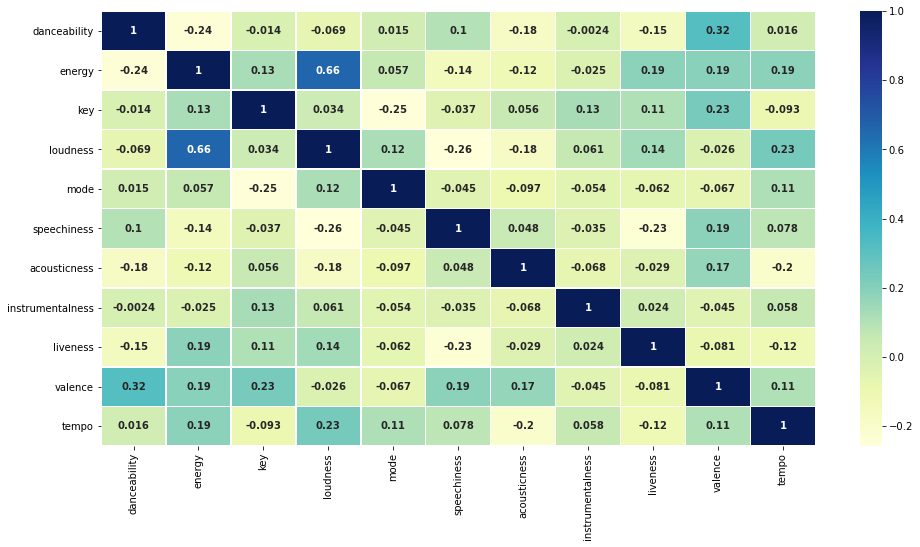

In [96]:
fig2 = plt.figure(figsize=(16, 8))
sns.heatmap(feats_to_cluster.corr(), annot=True, annot_kws={'weight':'bold'},linewidths=.5, cmap='YlGnBu')

#### loudness and energy are highly correlated

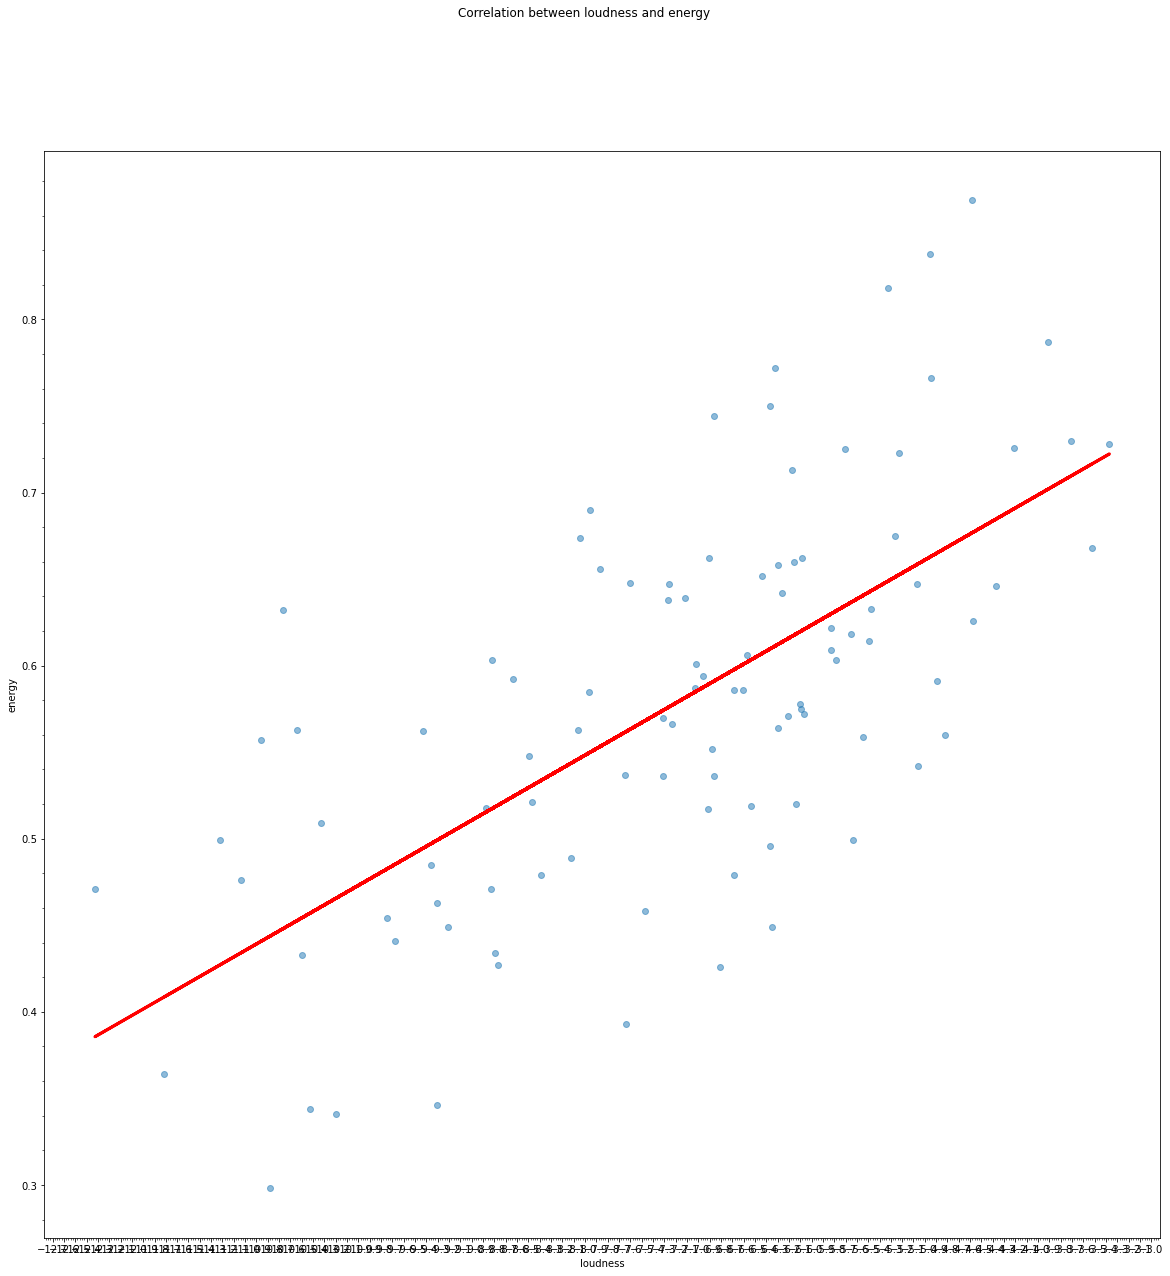

In [103]:
x = feats_to_cluster["loudness"].values
y = feats_to_cluster["energy"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(20, 20))
fig.suptitle("Correlation between loudness and energy")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("loudness")
plt.ylabel("energy")

plt.show()

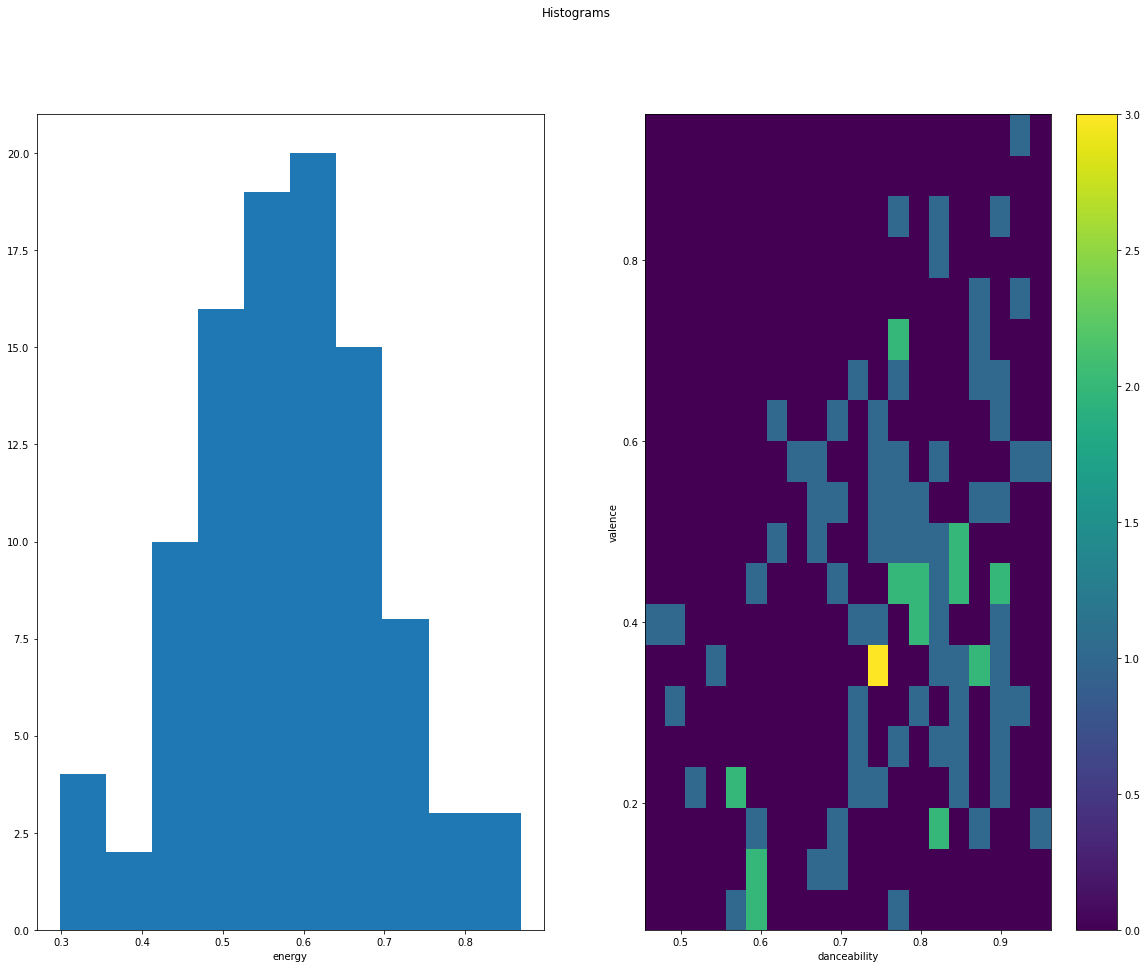

In [102]:
x = "danceability"
y = "valence"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(20, 15))
fig.suptitle("Histograms")
h = ax2.hist2d(feats_to_cluster[x], feats_to_cluster[y], bins=20)
ax1.hist(feats_to_cluster["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

In [86]:
chosen = ["energy", "liveness","tempo","valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]


X = feats_to_cluster[chosen].values
y = feats_to_cluster["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")